c:\users\jojo3\.conda\envs\2021-topic-04-team-02\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


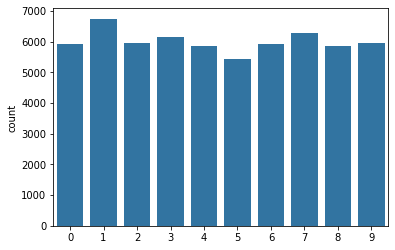

In [23]:
import seaborn as sns
import pickle
with open('data/train_points.p', 'rb') as f:
    X = pickle.load(f)
labels = X[:,0]
values = X[:,1:]
sns.countplot(labels, color = sns.color_palette()[0]);

In [47]:
with open('data/test_points.p', 'rb') as f:
    Y = pickle.load(f)
testvalues = Y[:,1:]
testlabels = Y[:,0]
testvalues.shape

(9999, 784)

![pickleUrl](https://media1.tenor.com/images/1756eb5631ade0eb64d57d256a5847f2/tenor.gif)

In [38]:
from scipy.stats import mode
k=100
def predict(x):
    differences = (values - x)
    distances = np.einsum('ij, ij->i', differences, differences)
    nearest = labels[np.argsort(distances)[:k]]
    return mode(nearest)[0][0]

In [62]:
sample = 100
predicted_value = predict(x=testvalues[sample,:])
labeled_value = testlabels[sample]
print(predicted_value, 'vs', labeled_value)

0 vs 0
